# Pollution Analysis

Personal Use of Climate Dataset from kaggle.com

Notebook Author: Gustavo Bravo

Date: January 25

Dataset Info:
"Air Pollution Forecasting
The Air Quality dataset. This is a dataset that reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China."

The observed variables are:

Dew point: The temperature (Celsius) that the air needs to be cooled to become saturated with water (reach 100% humidity)

Temperature: Measured in Celsius

Pressure: Atmospheric Pressure

Combined Wind Direction

Cumulated Wind Speed

Cumulated Hours of Snow

Cumulated Hours of Rain

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [187]:
variables_df = pd.read_csv("pollution_test_data1.csv")
dates_df = pd.read_csv("LSTM-Multivariate_pollution.csv")

In [188]:
# Get data from each column
complete_pollution = dates_df["pollution"].to_numpy()
date_and_time = pd.to_datetime(dates_df["date"])

lbls = {
    "pollution": "Pollution Level (PM 2.5 Concentration)",
    "dew": "Dew Point",
    "temp": "Temperature (Celsius)",
    "press": "Pressure",
    "wnd_dir": "Combined Wind Direction",
    "wnd_spd": "Combined Wind Speed",
    "snow": "Hours of Snowfall",
    "rain": "Hours of Rainfall"}

data_dict = {
    "pollution": None,
    "dew": None,
    "temp": None,
    "press": None,
    "wnd_dir": None,
    "wnd_spd": None,
    "snow": None,
    "rain": None}

for k in data_dict.keys():
    data_dict[k] = variables_df[k]

# Pollution Over Time Predicted Over Time From Kaggle.com

Text(0.5, 1.0, 'Pollution Predicted for Beijing')

<Figure size 720x432 with 0 Axes>

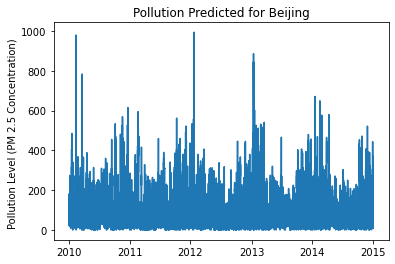

In [189]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.plot(date_and_time, complete_pollution,
)
plt.ylabel("Pollution Level " +\
           "(PM 2.5 Concentration) ")
plt.title("Pollution Predicted for Beijing")

# Calculate Correlation

Dew Point 
Regression Analysis:
Intercept: 337.2247
r value: 0.7114
R Squared: 0.5061
Standardard Error: 0.9243


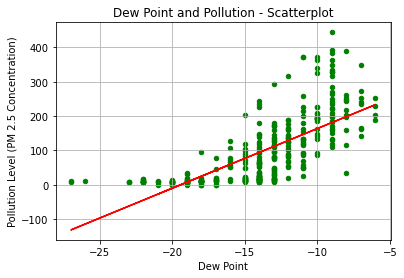

Temperature (Celsius) 
Regression Analysis:
Intercept: 92.0928
r value: -0.3051
R Squared: 0.0931
Standardard Error: 1.1096


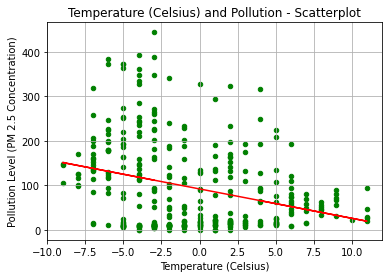

Pressure 
Regression Analysis:
Intercept: 4452.8004
r value: -0.2590
R Squared: 0.0671
Standardard Error: 0.8537


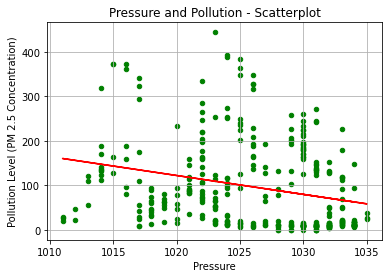

In [190]:
for obs_var in data_dict.keys():
        if obs_var == "pollution":
                continue
        if obs_var == "wnd_dir":
                break
        plt.scatter(data_dict.get(obs_var),data_dict.get("pollution"),s = 20, color="Green")
        plt.xlabel(lbls.get(obs_var))
        plt.ylabel(lbls.get("pollution"))

        # Get and make the label
        var_lbl = lbls.get(obs_var)
        plt.title(f"{var_lbl} and Pollution - Scatterplot")

        # Linear Regression
        result = stats.linregress(data_dict.get(obs_var),data_dict.get("pollution"))
        r = result.rvalue
        plt.grid()
        plt.plot(data_dict.get(obs_var),
                result.intercept + result.slope*data_dict.get(obs_var),
                "r",
                label="fitterline")
        items_dict = {
                "Intercept": result.intercept, 
                "r value": r,
                "R Squared": r**2,
                "Standardard Error": result.stderr
                }

        print(f"{var_lbl} \nRegression Analysis:")
        for k,v in items_dict.items():
                print(f"{k}: {v:.4f}")
        plt.show()        